In [4]:
import sys 
sys.path.append("..") 
import os
import pandas as pd
from utils import config
config.data_type = 'Mix6_mainCat_Ekphrasis_new'
from sklearn.model_selection import train_test_split

# config.xls_path = '../Train-Data/Mix6_mainCat_20/pro_review.xlsx'
config.xls_path = '/home/eagleuser/Users/leyan/Train-Data/Mix6_mainCat_Ekphrasis_new/pro_review.xlsx'
# path = str(os.path.abspath(config.xls_path)).replace('Summarize_parallel','')
total_df = pd.read_excel(str(os.path.abspath(config.xls_path)).replace('Summarize_parallel',''))

# total_df = total_df[total_df['review_len']>=50]
# total_df = total_df[total_df['summary_len']>=5]
total_df = total_df.sort_values(by=['review_len','overlap'], ascending = False)
train_df, val_df = train_test_split(total_df, test_size=0.1, 
                                    random_state=0, shuffle=True)

print(len(total_df))
print(len(train_df))
print(len(val_df))
print(str(os.path.abspath(config.xls_path)))
# train : 504075(90%),    test : 56009(10%) -> best 566084

779339
701405
77934
/home/eagleuser/Users/leyan/Train-Data/Mix6_mainCat_Ekphrasis_new/pro_review.xlsx


In [5]:
config.xls_path

'/home/eagleuser/Users/leyan/Train-Data/Mix6_mainCat_Ekphrasis_new/pro_review.xlsx'

In [6]:
def longest_common_subsequence(main_string, comparing_string):

#     main_string = main_string.split(" ")
#     comparing_string = comparing_string.split(" ")
    columns_length = len(main_string)  # Get the length of the first word or base word
    rows_length = len(comparing_string)  # Get the length of the second word or comparing word

    # MAKE A 2D LIST (MATRIX)
    dynamic_table = [[0] * (columns_length + 1) for i in range(rows_length + 1)]

    # rows_length = NUMBER OF ROWS
    # columns_length = NUMBER OF COLUMNS
    
    # FILL THE MATRIX FOLLOWING LCS ALGORITHM.
    for i in range(1, rows_length + 1):
        for j in range(1, columns_length + 1):
            if main_string[j - 1] == comparing_string[i - 1]:
                dynamic_table[i][j] = 1 + dynamic_table[i - 1][j - 1]

            else:
                dynamic_table[i][j] = max(dynamic_table[i - 1][j], dynamic_table[i][j - 1])

#     print("MATRIX ACCORDING TO LONGEST COMMON SUBSEQUENCE ALGORITHM: \n ")

    # for i in range(rows_length + 1):
    #     print(dynamic_table[i])

    #print("LENGTH OF LONGEST COMMON SUBSEQUENCE = ", dynamic_table[rows_length][columns_length])

    len_lcs = dynamic_table[rows_length][columns_length]

    i = len(comparing_string)
    j = len(main_string)

    lcs_string = str()

    # BACKTRACKING TO FIND THE LONGEST COMMON SUBSEQUENCE

    temp = True

    while temp is True:
        if dynamic_table[i][j] == 0:
            temp = False
        elif dynamic_table[i][j] == dynamic_table[i][j - 1]:
            j = j - 1

        else:
            lcs_string = main_string[j-1] + " " + lcs_string
            i = i - 1
            j = j - 1

    return lcs_string, len_lcs

In [7]:
# df.loc[i,'token_lcs'] = token_lcs
#             df.loc[i,'len_lcs'] = len_lcs
#             df.loc[i,'percent_lcs'] = percent_lcs
#             df.loc[i,'overlap_pos'] = overlap_pos
            
#             df.loc[i,'reveiw_len'] = len(rev_tokens)
#             df.loc[i,'summary_len'] = len(summary_tokens)

In [8]:
#%%
from tqdm import tqdm
from copy import deepcopy
def analay(df, mode):
#     df['token_lcs'] = 0
#     df['len_lcs'] = 0
#     df['percent_lcs'] = 0
#     df['overlap_pos'] = 0

#     df['reveiw_len'] = 0
#     df['summary_len'] = 0
#     df = df[:100]
    with tqdm(total=len(df)) as pbar:
        for i ,row in df.iterrows():       
            overlap_pos = None

#             rev, summary = row['review'], row['summary']
#             rev_tokens, summary_tokens = rev.split(" "), summary.split(" ")           
#             token_lcs, len_lcs = longest_common_subsequence(rev_tokens, summary_tokens)
#             percent_lcs = len_lcs / len(summary_tokens) * 100 # percent

#             rev_sents = rev.split(" . ")
#             overlap_sents = {idx: longest_common_subsequence(sent.split(" "), summary_tokens) for idx, sent in enumerate(rev_sents)}
#             sort_overlap_sent = {k:v for k,v in sorted(overlap_sents.items(), key= lambda item: item[1], reverse=True)}
#             overlap_sent_id = list(sort_overlap_sent.items())[0][0]

#             if (overlap_sent_id == 0) and (percent_lcs >= 20): overlap_pos = 0 # overlap_Top 
#             elif (overlap_sent_id == len(rev_tokens)-1) and (percent_lcs >= 20): overlap_pos = 1 # overlap_Final 
#             elif (percent_lcs >= 20): overlap_pos = 2 # overlap_other 
#             else: overlap_pos = -1 # no overlap 

#             df.loc[i,'token_lcs'] = token_lcs
#             df.loc[i,'len_lcs'] = len_lcs
#             df.loc[i,'percent_lcs'] = percent_lcs
#             df.loc[i,'overlap_pos'] = overlap_pos
            
#             df.loc[i,'reveiw_len'] = len(rev_tokens)
#             df.loc[i,'summary_len'] = len(summary_tokens)

            pbar.update(1)
#             pbar.set_description("%s row: %s | overlap_pos: %s (%2.2f)percent| len_lcs: %s" % (mode, i, overlap_pos, percent_lcs, len_lcs))
#     df = df[df['token_lcs']!=0]
    return df



In [9]:
train_df['review_len'].head()

472216    322
556246    141
79843     571
676151     67
4833      460
Name: review_len, dtype: int64

In [10]:
train_df.head()

,asin,review_ID,rating,vote,binaryrating,orign_review,orign_summary,review,summary,cheat,...,Noun_adj_keys,TextRank_keys,len_lcs,percent_lcs,overlap_pos,token_lcs,summary_polarity,summary_subjectivity,summary_check,summary_conflict
472216,B00WMU36Q6,1478217600,5,7,positive,Bought for my 10-yr old son. First composite ...,I think that was a good decision as he squares...,bought for my of yr old son . first composite ...,<s> i think that be a good decision as he squa...,"{'square', 'i', 'decision', 'ball', 'up', 'tha...",...,"['son', 'yr', 'old', 'bat', 'composite', 'rein...",[],15,88.235294,2,i think that be a good decision as he square u...,0.450000,0.400000,13,False
556246,B004XZHY34,1485302400,5,3,positive,Love it!! Works with my old style flip phone ...,Love It !!! Connect 2 phones !! I use Flip P...,love it work with my old style flip phone sams...,<s> love it connect number phone i use flip ph...,"{'phone', 'number', 'love', 'i', 'use', 'flip'...",...,"['style', 'old', 'battery', 'life', 'time', 'c...",[],9,81.818182,2,love it connect phone i use use flip phone,0.500000,0.600000,8,False
79843,B00142JKSG,1216080000,5,12,positive,I've been thinking about getting a HDTV for so...,Absolutely brilliant - stunning picture with u...,i have be think about get a hdtv for some time...,<s> absolutely brilliant stunning picture with...,"{'content', 'hd', 'picture', 'with'}",...,"['hdtv', 'purchase', 'confound', 'tv', 'commit...",[],5,50.000000,2,picture with hd content content,0.700000,1.000000,6,False
676151,B00BC1D346,1365465600,5,47,positive,Just bought this and found it very easy to ope...,Easy to use and does a great job,just buy this and find it very easy to operate...,<s> easy to use and do a great job </s>,"{'easy', 'do', 'to'}",...,"['number', 'slide', 'tray', 'multiple', 'negat...",[],4,40.000000,-1,and to and do,0.616667,0.791667,7,False
4833,B000VLNXRU,1357689600,4,4,positive,"As the title implies, this is a great piece of...",A must have for flight simmers who have a beef...,as the title imply this be a great piece of eq...,<s> a must have for flight simmer who have a b...,"{'for', 'up', 'flight', 'have', 'a', 'set', 'b...",...,"['piece', 'title', 'great', 'software', 'basic...",[],9,64.285714,2,a have for have a a set up up,0.200000,0.900000,9,False


In [11]:
val_df.head()

,asin,review_ID,rating,vote,binaryrating,orign_review,orign_summary,review,summary,cheat,...,Noun_adj_keys,TextRank_keys,len_lcs,percent_lcs,overlap_pos,token_lcs,summary_polarity,summary_subjectivity,summary_check,summary_conflict
540072,B01920SCBC,1455753600,5,3,positive,"I am an avid camper, backpacker, outdoor educa...",Great Survival/Hunting Knife for the Price!,i be an avid camper backpacker outdoor educati...,<s> great survival hunt knife for the price </s>,"{'hunt', 'great', 'for', 'survival', 'knife'}",...,"['camper', 'backpacker', 'education', 'avid', ...",[],5,55.555556,2,survival for the for the,0.800000,0.750000,6,False
130732,B005EROCLC,1366761600,4,3,positive,This camera works very well for the price. I'v...,Very nice camera - GREAT SWANN CUSTOMER SERVICE!,this camera work very well for the price . i h...,<s> very nice camera great swann customer serv...,"{'very', 'service', 'customer', 'camera', 'swa...",...,"['case', 'mind', 'thing', 'waterproof', 'case'...",[],4,44.444444,-1,camera swann customer service,0.790000,0.875000,7,False
302512,B00A7DNOYY,1386460800,5,6,positive,It's hard to tell what clothing may be like by...,This shirt fits very well and is very well built.,it be hard to tell what clothing may be like b...,<s> this shirt fit very well and be very well ...,"{'very', 'well', 'fit', 'shirt', 'be'}",...,[],[],7,58.333333,2,this shirt be well very well be,0.266667,0.333333,6,False
182659,B00I53VUEY,1407974400,4,7,positive,"So far, this TYT Quad Band is working just gre...",Great mobile transceiver for the price and cap...,so far this tyt quad band be work just great ....,<s> great mobile transceiver for the price and...,"{'for', 'great'}",...,"['work', 'band', 'tyt', 'quad', 'great', 'mone...",[],4,40.000000,-1,great for the and,0.800000,0.750000,6,False
223740,B00YAVF1E0,1513123200,1,2,negative,This is my 5th one of these they usually last ...,I'm wondering if cheesy company's are using am...,this be my of th one of these they usually las...,<s> i be wonder if cheesy company be use amazo...,"{'rid', 'return', 'number', 'i', 'policy', 'co...",...,"['number', 'company', 'wonder', 'amazon', 'che...",[],19,90.476190,2,be be wonder if cheesy company be use amazon u...,-0.500000,0.600000,16,False


In [12]:
import os
import matplotlib.pyplot as plt


# print(str(os.path.abspath('train_df.xlsx')))
if os.path.exists('train_df.xlsx'):
    print('True')
    p_train_df = pd.read_excel('train_df.xlsx')
    p_val_df = pd.read_excel('val_df.xlsx')
else:    
    p_train_df = analay(deepcopy(train_df), 'train')
    p_train_df.to_excel('train_df.xlsx', encoding='utf8')

    p_val_df = analay(deepcopy(val_df), 'test')
    p_val_df.to_excel('val_df.xlsx', encoding='utf8')

100%|██████████| 77934/77934 [00:03<00:00, 22692.50it/s]


In [13]:
# p_train_df['review_ID'] = p_train_df.review_ID.astype(str)
# p_train_df['review_ID'] = p_train_df.review_ID.astype(str)

# p_train_df.describe()

p_train_df.columns

Index(['asin', 'review_ID', 'rating', 'vote', 'binaryrating', 'orign_review',
       'orign_summary', 'review', 'summary', 'cheat', 'cheat_num', 'overlap',
       'review_len', 'summary_len', 'POS_keys', 'DEP_keys', 'Noun_adj_keys',
       'TextRank_keys', 'len_lcs', 'percent_lcs', 'overlap_pos', 'token_lcs',
       'summary_polarity', 'summary_subjectivity', 'summary_check',
       'summary_conflict'],
      dtype='object')

count    701405.000000
mean        191.908424
std         154.317272
min          28.000000
25%          88.000000
50%         139.000000
75%         236.000000
max        1000.000000
Name: review_len, dtype: float64
review_len > 500 : 38853


Text(0.5, 1.0, 'review_len Analysis')

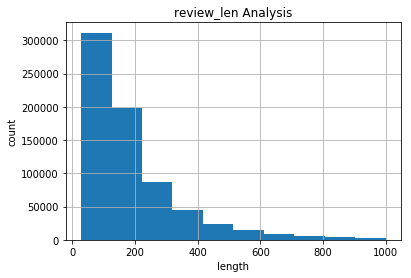

In [14]:
hist = p_train_df['review_len'].hist(bins=10)
s = p_train_df['review_len'].describe(); print(s)
# print('reveiw_len <= 20 :',len(p_train_df[p_train_df['reveiw_len']<=20]))
print('review_len > 500 :',len(p_train_df[p_train_df['review_len']>500])) # # max pos, max_enc_steps 
plt.ylabel('count')
plt.xlabel('length')

plt.title('review_len Analysis')

summary_len > 20 : 11801
count    701405.000000
mean         11.255280
std           3.229351
min           6.000000
25%           9.000000
50%          10.000000
75%          13.000000
max          22.000000
Name: summary_len, dtype: float64


Text(0.5, 1.0, 'summary_len Analysis')

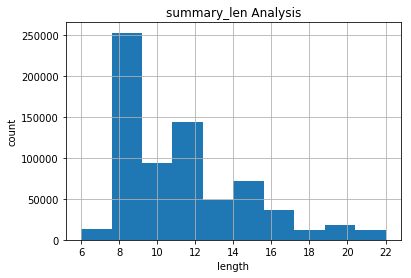

In [15]:
print('summary_len > 20 :',len(p_train_df[p_train_df['summary_len']>20]))  # max_dec_steps
# print('summary_len <= 5 :',len(p_train_df[p_train_df['summary_len']<6])) # min_dec_steps
hist = p_train_df['summary_len'].hist(bins=10)
s = p_train_df['summary_len'].describe(); print(s)
plt.ylabel('count')
plt.xlabel('length')
plt.title('summary_len Analysis')

# Rating

Text(0.5, 1.0, 'Rating')

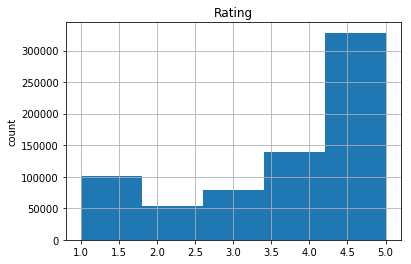

In [16]:
hist = p_train_df['rating'].hist(bins=5)
# s = p_train_df['vote'].describe(); print(s)
plt.ylabel('count')
plt.title('Rating')

# sentiment

summary_polarity and summary_subjectivity  > 0 : 605965
count    701405.000000
mean          0.613583
std           0.220062
min           0.022222
25%           0.466667
50%           0.600000
75%           0.750000
max           1.000000
Name: summary_subjectivity, dtype: float64


Text(0.5, 1.0, 'summary_subjectivity')

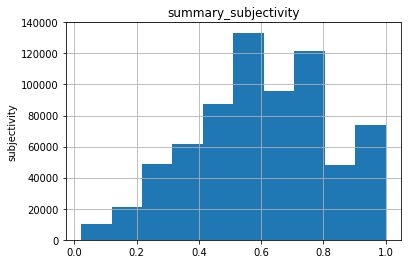

In [17]:
print('summary_polarity and summary_subjectivity  > 0 :',len(p_train_df[
    (abs(p_train_df['summary_polarity'])>0.1) &
    (p_train_df['summary_subjectivity']>0.25)

]))  # max_dec_steps
# print('summary_len <= 5 :',len(p_train_df[p_train_df['summary_len']<6])) # min_dec_steps

hist = p_train_df['summary_subjectivity'].hist(bins=10)
s = p_train_df['summary_subjectivity'].describe(); print(s)
plt.ylabel('subjectivity')
plt.title('summary_subjectivity')

summary_polarity and summary_subjectivity  > 0 : 605965
count    701405.000000
mean          0.344687
std           0.404048
min          -1.000000
25%           0.133333
50%           0.400000
75%           0.650000
max           1.000000
Name: summary_polarity, dtype: float64


Text(0.5, 1.0, 'summary_polarity')

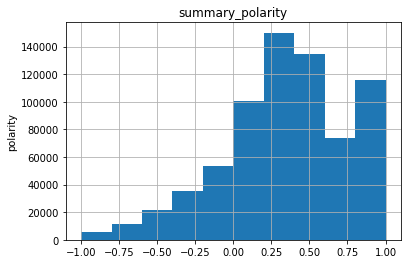

In [18]:
print('summary_polarity and summary_subjectivity  > 0 :',len(p_train_df[
    (abs(p_train_df['summary_polarity'])>0.1) &
    (p_train_df['summary_subjectivity']>0.25)

]))  # max_dec_steps
# print('summary_len <= 5 :',len(p_train_df[p_train_df['summary_len']<6])) # min_dec_steps

hist = p_train_df['summary_polarity'].hist(bins=10)
s = p_train_df['summary_polarity'].describe(); print(s)
plt.ylabel('polarity')
plt.title('summary_polarity')

# POS_Keyword

In [19]:
p_train_df['len_Pos_keys'] = 0
f = lambda x: len(eval(x))
p_train_df['len_Pos_keys'] = p_train_df['POS_keys'].apply(f)
p_train_df[['POS_keys','len_Pos_keys']].head()
p_train_df[['POS_keys','len_Pos_keys']].describe()

,len_Pos_keys
count,701405.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [20]:
print(len(p_train_df[p_train_df['len_Pos_keys']<=5]))

701405


# DEP_Keyword

In [21]:
p_train_df['len_DEP_keys'] = 0
f = lambda x: len(eval(x))
p_train_df['len_DEP_keys'] = p_train_df['DEP_keys'].apply(f)
p_train_df[['DEP_keys','len_DEP_keys']].head()
p_train_df[['DEP_keys','len_DEP_keys']].describe()

,len_DEP_keys
count,701405.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


# Noun_adj_keys

In [22]:
p_train_df['len_Noun_adj_keys'] = 0
f = lambda x: len(eval(x))
p_train_df['len_Noun_adj_keys'] = p_train_df['Noun_adj_keys'].apply(f)
p_train_df[['Noun_adj_keys','len_Noun_adj_keys']].head()
p_train_df[['Noun_adj_keys','len_Noun_adj_keys']].describe()

,len_Noun_adj_keys
count,701405.000000
mean,34.899466
std,31.676144
min,0.000000
25%,15.000000
50%,25.000000
75%,44.000000
max,376.000000


In [23]:
print(len(p_train_df[p_train_df['len_Noun_adj_keys']<=5]))

22242


# TextRank_Keyword

In [24]:
p_train_df.columns

Index(['asin', 'review_ID', 'rating', 'vote', 'binaryrating', 'orign_review',
       'orign_summary', 'review', 'summary', 'cheat', 'cheat_num', 'overlap',
       'review_len', 'summary_len', 'POS_keys', 'DEP_keys', 'Noun_adj_keys',
       'TextRank_keys', 'len_lcs', 'percent_lcs', 'overlap_pos', 'token_lcs',
       'summary_polarity', 'summary_subjectivity', 'summary_check',
       'summary_conflict', 'len_Pos_keys', 'len_DEP_keys',
       'len_Noun_adj_keys'],
      dtype='object')

In [25]:
p_train_df['len_TextRank_keys'] = 0
f = lambda x: len(eval(x))
p_train_df['len_TextRank_keys'] = p_train_df['TextRank_keys'].apply(f)
p_train_df[['TextRank_keys','len_TextRank_keys']].head()
p_train_df[['TextRank_keys','len_TextRank_keys']].describe()

,len_TextRank_keys
count,701405.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [26]:
print(len(p_train_df[p_train_df['len_TextRank_keys']<=1]))

701405


# Prune data length

In [27]:
print('review_len <= 500 and summary_len<= 20 and summary_polarity > 0.1 and summary_subjectivity > 0.25 : ',len(p_train_df[
    (p_train_df['percent_lcs']>=25) & (p_train_df['review_len']>=50) &(p_train_df['review_len']<=500) & (p_train_df['summary_len']<=20) &
    (abs(p_train_df['summary_polarity'])>=0.1) &
    (p_train_df['summary_subjectivity']>=0.1)  
#     (p_train_df['overlap_pos']!=0)
#     (not((p_train_df['overlap_pos']==0) & (p_train_df['percent_lcs']>50)))
#     (p_train_df['len_TextRank_keys']>0) 
#     (p_train_df['len_DEP_keys']>5) & 
#     (p_train_df['len_Pos_keys']>5)
                                        ]))
print('review_len <= 500 and summary_len<= 20 and summary_polarity > 0.1 and summary_subjectivity > 0.25 : ',len(p_val_df[
    (p_val_df['review_len']>=50) &(p_val_df['review_len']<=500) & (p_val_df['summary_len']<=20) &
    (abs(p_val_df['summary_polarity'])>=0.1) &
    (p_val_df['summary_subjectivity']>=0.1) & (p_val_df['overlap_pos']!=0)    
                                        ]))

# # first_acc = 0.325
min_df = p_train_df[
    (p_train_df['review_len']<=500) & (p_train_df['summary_len']<=20) &
    (abs(p_train_df['summary_polarity'])>=0.1) &
    (p_train_df['summary_subjectivity']>=0.1)    
                                        ]

# print('reveiw_len > 7000 :',len(p_train_df[p_train_df['reveiw_len']>=700])) # # max pos, max_enc_steps 
# s = p_train_df['reveiw_len'].describe(); print(s)
# s = s.drop(labels = ['count'])
# s.plot.bar()
# plt.ylabel('length')
# plt.title('reveiw_len')
# plt.show()

review_len <= 500 and summary_len<= 20 and summary_polarity > 0.1 and summary_subjectivity > 0.25 :  552479
review_len <= 500 and summary_len<= 20 and summary_polarity > 0.1 and summary_subjectivity > 0.25 :  59246


# cheat_num

count    603142.000000
mean          5.403888
std           2.796530
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          18.000000
Name: cheat_num, dtype: float64


Text(0.5, 1.0, 'cheat_num')

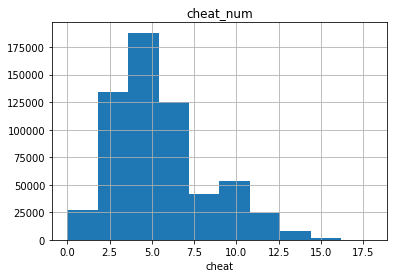

In [28]:
hist = min_df['cheat_num'].hist(bins=10)
s = min_df['cheat_num'].describe(); print(s)
plt.xlabel('cheat')
plt.title('cheat_num')

# summary_conflict

149054
454088
conflict 24.712920008886798
not conflict 75.2870799911132


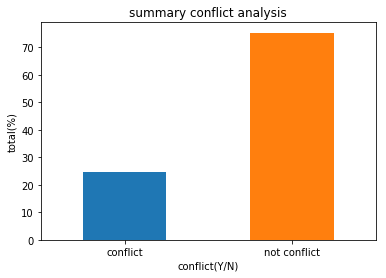

In [29]:
s = len(min_df[min_df['summary_conflict']==True]); print(s) 
s = len(min_df[min_df['summary_conflict']==False]); print(s) 

print('conflict',len(min_df[(min_df['summary_conflict']==True)])/len(min_df)*100)
print('not conflict',len(min_df[(min_df['summary_conflict']==False)])/len(min_df)*100)


s = pd.Series({'conflict':len(min_df[(min_df['summary_conflict']==True)])/len(min_df)*100, 
           'not conflict':len(min_df[(min_df['summary_conflict']==False)])/len(min_df)*100,      
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.xlabel('conflict(Y/N)')
plt.title('summary conflict analysis')
plt.xticks(rotation=0)
plt.show()

# percent_lcs EDA(20 divided)

count    603142.000000
mean         51.967161
std          22.155730
min           0.000000
25%          35.714286
50%          50.000000
75%          75.000000
max          90.000000
Name: percent_lcs, dtype: float64


Text(0.5, 1.0, 'percent_lcs')

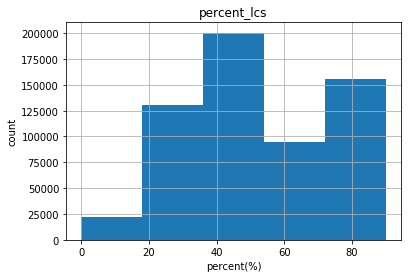

In [30]:
hist = min_df['percent_lcs'].hist(bins=5)
s = min_df['percent_lcs'].describe(); print(s)
plt.ylabel('count')
plt.xlabel('percent(%)')
plt.title('percent_lcs')

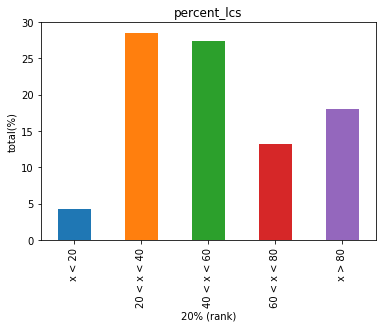

In [31]:
# 统计学上的四分为函数
# 原则上p是可以取0到1之间的任意值的。但是有一个四分位数是p分位数中较为有名的。

# 所谓四分位数；即把数值由小到大排列并分成四等份，处于三个分割点位置的数值就是四分位数。

# 第1四分位数 (Q1)，又称“较小四分位数”，等于该样本中所有数值由小到大排列后第25%的数字。
# 第2四分位数 (Q2)，又称“中位数”，等于该样本中所有数值由小到大排列后第50%的数字。
# 第3四分位数 (Q3)，又称“较大四分位数”，等于该样本中所有数值由小到大排列后第75%的数字。
# 第3四分位数与第1四分位数的差距又称四分位距（InterQuartile Range,IQR）

s = pd.Series({'x < 20':len(min_df[min_df['percent_lcs']<20])/len(min_df)*100, 
           '20 < x < 40':len(min_df[(min_df['percent_lcs']>20) & (min_df['percent_lcs']<40)])/len(min_df)*100, 
           '40 < x < 60':len(min_df[(min_df['percent_lcs']>40) & (min_df['percent_lcs']<60)])/len(min_df)*100, 
           '60 < x < 80':len(min_df[(min_df['percent_lcs']>60) & (min_df['percent_lcs']<80)])/len(min_df)*100, 
           'x > 80':len(min_df[min_df['percent_lcs']>80])/len(min_df)*100          
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.xlabel('20% (rank)')
plt.title('percent_lcs')
plt.show()

overlap Top :11.34 %
overlap Final :0.00 %
overlap Other Pos :40.48 %
No overlap :48.18 %


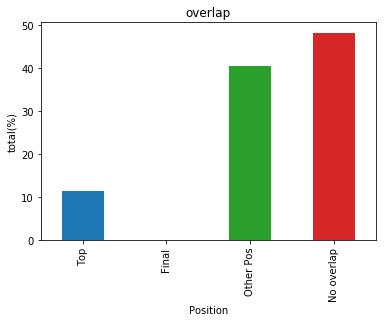

In [32]:
'''
overlap => percent_lcs > (50% summary len)
overlap_pos : 0 Top
overlap_pos : 1 Final
overlap_pos : 2 Other Pos
overlap_pos : -1 No overlap
'''

# print('overlap Top :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 0) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
# print('overlap Final :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 1) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
# print('overlap Other Pos :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
# print('No overlap :%2.2f'% float(len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100),'%') 

# s = pd.Series({'Top':len(min_df[(min_df['overlap_pos'] == 0) & (min_df['percent_lcs']>50)])/len(min_df)*100, 
#            'Final':len(min_df[(min_df['overlap_pos'] == 1) & (min_df['percent_lcs']>50)])/len(min_df)*100,      
#            'Other Pos':len(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)])/len(min_df)*100,  
#            'No overlap':len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100,  
#           })


print('overlap Top :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 0) ])/len(min_df)*100),'%') 
print('overlap Final :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 1) ])/len(min_df)*100),'%') 
print('overlap Other Pos :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 2) ])/len(min_df)*100),'%') 
print('No overlap :%2.2f'% float(len(min_df[(min_df['overlap_pos']==-1)])/len(min_df)*100),'%') 

s = pd.Series({'Top':len(min_df[(min_df['overlap_pos'] == 0) ])/len(min_df)*100, 
           'Final':len(min_df[(min_df['overlap_pos'] == 1) ])/len(min_df)*100,      
           'Other Pos':len(min_df[(min_df['overlap_pos'] == 2) ])/len(min_df)*100,  
           'No overlap':len(min_df[(min_df['overlap_pos']==-1)])/len(min_df)*100,  
          })

s.plot.bar()
plt.ylabel('total(%)')
plt.xlabel('Position')
plt.title('overlap')
plt.show()

# Ext/Abs分界(50)

percent_lcs x > 50  42.70 %
percent_lcs x <= 50  57.30 %


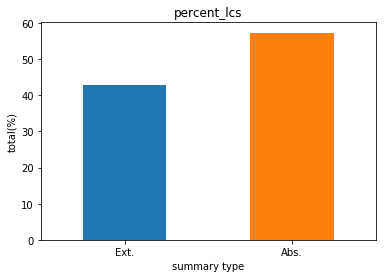

In [33]:
print('percent_lcs x > 50  %2.2f'% float(len(min_df[(min_df['percent_lcs']>50)])/len(min_df)*100),'%')  # max_dec_steps
print('percent_lcs x <= 50  %2.2f'% float(len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100),'%')  # max_dec_steps

s = pd.Series({'Ext.':len(min_df[(min_df['percent_lcs']>50)])/len(min_df)*100, 
           'Abs.':len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100,      
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.xlabel('summary type')
plt.title('percent_lcs')
plt.xticks(rotation=0)
plt.show()

overlap Top :9.68 %
overlap Final :0.00 %
overlap Other Pos :33.02 %
No overlap :57.30 %


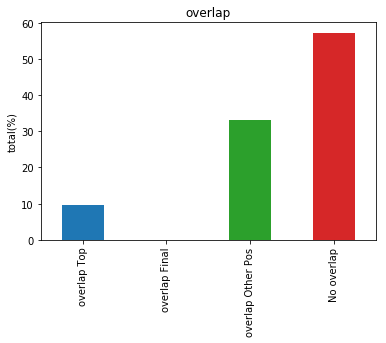

In [34]:
'''
overlap => percent_lcs > (50% summary len)
overlap_pos : 0 Top
overlap_pos : 1 Final
overlap_pos : 2 Other Pos
overlap_pos : -1 No overlap
'''

print('overlap Top :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 0) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('overlap Final :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 1) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('overlap Other Pos :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('No overlap :%2.2f'% float(len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100),'%') 

s = pd.Series({'overlap Top':len(min_df[(min_df['overlap_pos'] == 0) & (min_df['percent_lcs']>50)])/len(min_df)*100, 
           'overlap Final':len(min_df[(min_df['overlap_pos'] == 1) & (min_df['percent_lcs']>50)])/len(min_df)*100,      
           'overlap Other Pos':len(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)])/len(min_df)*100,  
           'No overlap':len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100,  
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.title('overlap')
plt.show()

In [35]:
def view(df, condition, view_num=10):
    package_dict = []
    for i in range(view_num):
        d1 = dict(min_df[eval(condition)].iloc[i])
        d2 = {'review':d1['review'],
              'summary':d1['summary'],
              'summary_subjectivity':d1['summary_subjectivity'],
              'summary_polarity':d1['summary_polarity'],
#               'token_lcs':d1['token_lcs'],
#               'overlap':d1['overlap'],
#               'percent_lcs':d1['percent_lcs'],
              'keywords':d1['POS_keys']            
             }
        package_dict.append(d2)
    return package_dict
        
# view(min_df, "(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']<50)")
view(min_df, "(min_df['review_len']<=50) & (min_df['percent_lcs']<=40) & (min_df['summary_len']>=15) & (min_df['summary_subjectivity']>=0.1)")



[{'review': 'after buy buying this blu ray i find out i still have to buy number dollar worth of cord because it come with no cord it be a waste of money i have buy a good blu ray then that before there be a piece of .',
  'summary': '<s> it not wroth the money do not buy look at other blu ray </s>',
  'summary_subjectivity': 0.375,
  'summary_polarity': -0.125,
  'keywords': '[]'},
 {'review': 'installed number of these number megapixel camera and all work fine except for number of them . zos i be prompt to ship out a replacement camera and now system work great in daytime and . at night which be what i expect in this price range .',
  'summary': '<s> good value in this price range for number camera with a of tb hard drive system </s>',
  'summary_subjectivity': 0.5708333333333333,
  'summary_polarity': 0.2041666666666666,
  'keywords': '[]'},
 {'review': 'after read all the review on this site and see some of the poor review that this product get i have to do this wonderful product s

In [36]:
dict(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)].iloc[0:10])['summary']

472216    <s> i think that be a good decision as he squa...
556246    <s> love it connect number phone i use flip ph...
4833      <s> a must have for flight simmer who have a b...
669633    <s> great basic calculator and it do have an o...
276186    <s> inner baffle would have be nice otherwise ...
627864    <s> dottie one touch number be a step in the w...
470639            <s> i love my cherry red public bike </s>
114631    <s> an audio engineer from the great audio com...
506132    <s> i feel like a perfect fool for pay number ...
213911    <s> a gentle reminder to just keep breathing </s>
Name: summary, dtype: object

In [37]:
review_path = '/home/eagleuser/Users/leyan/Train-Data/Mix6_mainCat_Ekphrasis_new/review.xlsx'
df = pd.read_excel(review_path)

# review_path = '/home/eagleuser/Users/leyan/Train-Data/Mix6_mainCat_best/review.xlsx'
# df = pd.read_excel(review_path)

In [38]:
df.columns

Index(['asin', 'orign_review', 'orign_summary', 'review', 'summary', 'overall',
       'vote', 'review_ID', 'lemm_review_len', 'lemm_summary_len'],
      dtype='object')

In [39]:
df[(df['lemm_review_len']<=70)][['review','summary','lemm_review_len']].head()

,review,summary,lemm_review_len
2,the mics quality be okay but i try use it with...,<s> quality okay but annoy white noise </s>,58
24,grant i have not use a number sennheiser but f...,<s> a great shotgun mic for the price </s>,55
27,you can not have too many adapter if you be a ...,<s> a must have in the audio kit </s>,59
28,i purchase two of these for my audio toolkit a...,<s> please with this hde xlr of pin male to of...,64
50,these be good monitor for my video edit for ab...,<s> extremely short lifespan number die on me ...,68


In [40]:
# df[(df['review_ID']==1497744000) & (df['lemm_review_len']==74)]
idx = 0
print(df[(df['lemm_review_len']<=70)][['review','summary','lemm_review_len']].iloc[idx]['review'])
print(df[(df['lemm_review_len']<=70)][['review','summary','lemm_review_len']].iloc[idx]['summary'])
print(df[(df['lemm_review_len']<=70)][['asin','review','summary','lemm_review_len']].iloc[idx]['asin'])
print(df[(df['lemm_review_len']<=70)][['review','summary','review_ID']].iloc[idx]['review_ID'])
print(df[(df['lemm_review_len']<=70)][['review','summary','lemm_review_len']].iloc[idx]['lemm_review_len'])

the mics quality be okay but i try use it with my i river mp player and my computer and i get that really annoy white noise in the background all the time it be really loud . before you buy it check out some sample recording on the internet if you be interested in high quality .
<s> quality okay but annoy white noise </s>
B00001W0DT
1174089600
58


In [41]:
print(df[(df['lemm_review_len']<=70)][['orign_review','orign_summary']].iloc[idx]['orign_review'])
print(df[(df['lemm_review_len']<=70)][['orign_review','orign_summary']].iloc[idx]['orign_summary'])
print(df[(df['lemm_review_len']<=70)][['orign_review','summary']].iloc[idx]['summary'])

the mic's quality is okay but i tried using it with my iriver mp3-player and my computer and i get that really annoying white noise in the background all the time (it's really loud). before you buy it check out some sample-recordings on the internet if you are interested in high quality.
quality okay, but annoying white noise
<s> quality okay but annoy white noise </s>


In [42]:
min_df.columns

Index(['asin', 'review_ID', 'rating', 'vote', 'binaryrating', 'orign_review',
       'orign_summary', 'review', 'summary', 'cheat', 'cheat_num', 'overlap',
       'review_len', 'summary_len', 'POS_keys', 'DEP_keys', 'Noun_adj_keys',
       'TextRank_keys', 'len_lcs', 'percent_lcs', 'overlap_pos', 'token_lcs',
       'summary_polarity', 'summary_subjectivity', 'summary_check',
       'summary_conflict', 'len_Pos_keys', 'len_DEP_keys', 'len_Noun_adj_keys',
       'len_TextRank_keys'],
      dtype='object')

In [43]:
print(min_df[(min_df['review_len']<=70)][['summary_polarity','summary_subjectivity','binaryrating']].iloc[0]['binaryrating'])
print(min_df[(min_df['review_len']<=70)][['summary_polarity','summary_subjectivity','rating']].iloc[0]['rating'])
print(min_df[(min_df['review_len']<=70)][['summary_polarity','summary_subjectivity','summary_conflict']].iloc[0]['summary_polarity'])
print(min_df[(min_df['review_len']<=70)][['summary_polarity','summary_subjectivity','summary_conflict']].iloc[0]['summary_subjectivity'])
print(min_df[(min_df['review_len']<=70)][['summary_polarity','summary_subjectivity','summary_conflict']].iloc[0]['summary_conflict'])
print(min_df[(min_df['review_len']<=70)][['summary_polarity','summary_subjectivity','Noun_adj_keys']].iloc[0]['Noun_adj_keys'])


positive
5.0
0.6166666666666667
0.7916666666666667
False
['number', 'slide', 'tray', 'multiple', 'negative', 'slide', 'horizontal']


In [44]:
min_df.columns

Index(['asin', 'review_ID', 'rating', 'vote', 'binaryrating', 'orign_review',
       'orign_summary', 'review', 'summary', 'cheat', 'cheat_num', 'overlap',
       'review_len', 'summary_len', 'POS_keys', 'DEP_keys', 'Noun_adj_keys',
       'TextRank_keys', 'len_lcs', 'percent_lcs', 'overlap_pos', 'token_lcs',
       'summary_polarity', 'summary_subjectivity', 'summary_check',
       'summary_conflict', 'len_Pos_keys', 'len_DEP_keys', 'len_Noun_adj_keys',
       'len_TextRank_keys'],
      dtype='object')

In [45]:
min_df[(min_df['review_len']>=58) & (min_df['review_ID']==1174089600)].iloc[0]['review']

'ok so i read a whole lot of very positive review on this unit before i buy it and i have since return it . on the positive side it read usb flash drive but could not get a usb drive to work with it as i suspect you need to have it format to fat not ntfs and i do not have a fat formatted drive around to check . i read memory card but it be very slow with a of pixel image . for upscaling perhaps it me but i really do not notice the difference between it and my philip number unit which do not have a build in upscale . i try a variety of movie and there be little if any difference that i could notice on my number lcd panel that would compel me to spend the extra money for it . it play all divx format movie i throw at it even the encoders that use qp el . so that be quite good . for record dvd they seem have some sort of unstable mode when spun up where there be a very audible sound come from the unit . this do not happen with purchased dvd but only the burn one i try . so after my number 

In [46]:
min_df[(min_df['review_len']>=58) & (min_df['review_ID']==1174089600)].iloc[0]['summary']

'<s> i read some great review before i buy but </s>'

In [47]:
min_df[(min_df['review_len']>=58) & (min_df['review_ID']==1174089600)].iloc[0]['percent_lcs']

63.63636363636363

In [48]:
min_df[(min_df['review_len']>=58) & (min_df['review_ID']==1174089600)].iloc[0]['Noun_adj_keys']

"['review', 'lot', 'very positive', 'whole', 'side', 'drive', 'usb', 'flash', 'ntfs', 'positive', 'card', 'memory', 'slow', 'panel', 'movie', 'number', 'lcd', 'difference', 'variety', 'money', 'extra', 'little', 'dvd', 'record', 'sound', 'mode', 'sort', 'very audible', 'unstable', 'albeit', 'reason', 'number', 'week', 'perfectly good', 'good', 'dvd', 'hdmi', 'market', 'teh', 'player', 'choice', 'bad', 'cable', 'hdmi', 'nice']"

In [49]:
['background', 'mic', 'quality', 'i', 'river', 'noise', 'player', 'computer']

['background', 'mic', 'quality', 'i', 'river', 'noise', 'player', 'computer']